# Autodifferentiation tutorial

In this tutorial, we will be implementing autodifferentiation from scratch, without using external python libraries.

## Problem overview

In particular, we will be defining a custom `Value` object in python.

This object defines a scalar value (analogous to a python `float`) which can have primitive operations (e.g. add/multiply/pow) applied to it. Each primitive operation returns a new `Value` object.

Importantly, each `Value` object keeps track of the child `Value` objects which created it, and defines a `._backward` method which computes the vector-Jacobian product of the primative operation which created it.

This extra bookmarking allows us to define a `Value.backward()` method (similar to `PyTorch`) which recursively backpropagates gradients through the entire computational graph, accumulating gradients in the leaf `Values` of the graph.


## Part A: implement the `Value` class

The `Value` class is defined in `engine.py`.

There are a number of lines of code missing from this class that you must fill in:

> **Task A.1**: Implement the primitive operations which currently raise a `NotImplementedError`

> **Task A.2**: Implement the `Value.backward` method.

> **Task A.3**: Test that the class is correctly implemented by running the tests defined in `engine.py`

More hints are contained in `engine.py`.

## Part B: use the `Value` class to solve a differentiable physics problem

Once we have a working `Value` object, we can use it to solve any problem requiring gradients.

In this part, we will use the `Value` object to learn how to **throw a ball** to hit a target.

### Problem overview

Imagine you are located at $P1 = (0,0)$ and you throw a ball with an initial velocity $v$ at an angle $\alpha$ from the x-axis. Your goal is to hit a target at $P2 = (x_2, y_2)$. What are values of $\alpha$ and $v$ you should use?

We can treat this as a inverse problem, where the goal is to minimise the following loss function

$$
L(v,\alpha) = (F(v, \alpha, x_2) - y_2)^2 ~~~~~~~(1)
$$

Here $F(v, \alpha, x_2)$ is our forward physics model, which tells us the height of the ball at $x_2$ given the initial velocity and angle of the ball.

In this case, $F$ is given by

$$
F(v, \alpha, x_2) = - \frac{g}{2} \left( \frac{x_2}{v \cos \alpha} \right)^2 + x_2 \tan \alpha ~~~~~~~(2)
$$

where $g$ is the acceleration due to gravity.

> **Optional task B.1**: Derive (2) using Netwon's laws.

> **Task B.2**: Write a python function that computes $F(v, \alpha, x_2)$, where $v$ and $\alpha$ are `Value` objects.

> **Task B.3**: Use `Value.backward` to write a gradient descent algorithm which minimises the loss function (1), given the starting guess of $v$ and $\alpha$ below.

> **Task B.4**: Verify that the learned values of $\alpha$ and $v$ hits the target by plotting the optimised trajectory.

> **Task B.5**: What happens to the trajectory when you change the starting guess of $v$ and $\alpha$? Why is this the case?

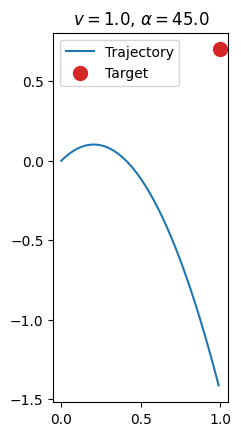

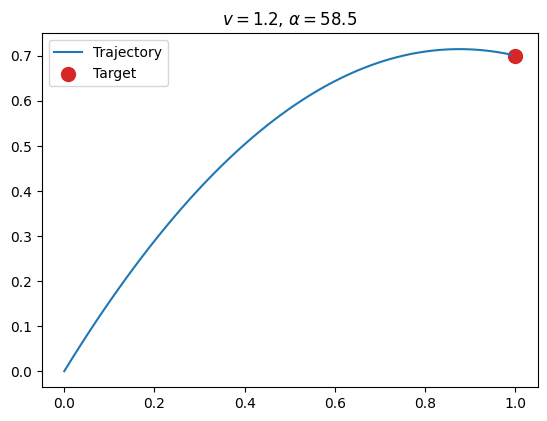

In [ ]:
import math
import matplotlib.pyplot as plt
from engine import Value

g = 9.81
x2, y2 = 1, 0.7

v = Value(1)# starting guess
alpha = Value(45*math.pi/180)# starting guess

def plot_trajectory(v, alpha):
    xs = [x2*(i/100) for i in range(100)]
    ys = [F(v, alpha, x).data for x in xs]
    plt.figure()
    plt.title(f"$v={v.data:.1f}$, $\\alpha={180*alpha.data/math.pi:.1f}$")
    plt.plot(xs, ys, label="Trajectory")
    plt.scatter(x2, y2, label="Target", s=100, color="tab:red")
    plt.gca().set_aspect("equal")
    plt.legend()
    plt.show()

def F(v, alpha, x2):
    "Forward physics model"
    return -(g/2)*((x2 / v * alpha.cos())**2) + (x2*(alpha.sin()/alpha.cos()))

lr = 1e-2
plot_trajectory(v, alpha)
for i in range(1000):
    y = F(v, alpha, x2)
    loss = (y-y2)**2
    loss.backward()
    v = Value(v.data - lr*v.grad)
    alpha = Value(alpha.data - lr*alpha.grad)
plot_trajectory(v, alpha)